# Topics:

# 1. Issues of Feed Forward Neural Network (FFNN)

# 2. Convolutional Neural Network

# 3. Dimension Analysis

# 4. Loss Functions and Evaluation Metrics

# 5. Some use cases of CNN

# 1. Issues of Feed Forward Neural Network (FFNN)



1.   The input image is flattened before feeding it to the FFNN. The image losses spatial information while flattening the image.
2.   Number of parameters for FFNN is high.



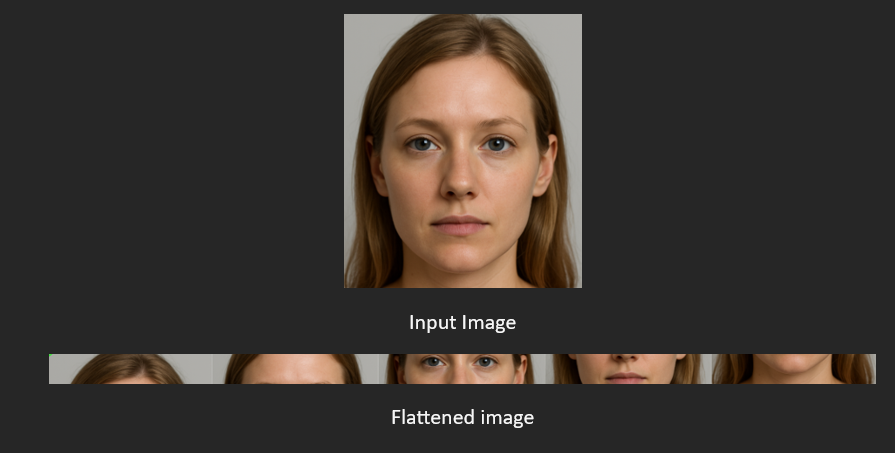

For example, in this image, the original vertical position of the lips relative to the eyes is not preserved after flattening.



1.   On the other hand, Convolutional Neural Network (CNN) extracts the features directly from the image, thus, it doesn't lose spatial information.
2.  Number of parameters for CNN is comparatively low (Will be shown later).

# 2. Convolutional Neural Network (CNN)

A Convolutional Neural Network comprises of the following components:


*   Convolution
*   Downsampling and/or Upsampling
*   Batch Normalization
*   Activation Functions
*   Fully Connected Layer







# 2.1. Convolution


In convolution, a small kernel moves across the input. At each position, it multiplies its values with the overlapping input values and sums them to produce one number.

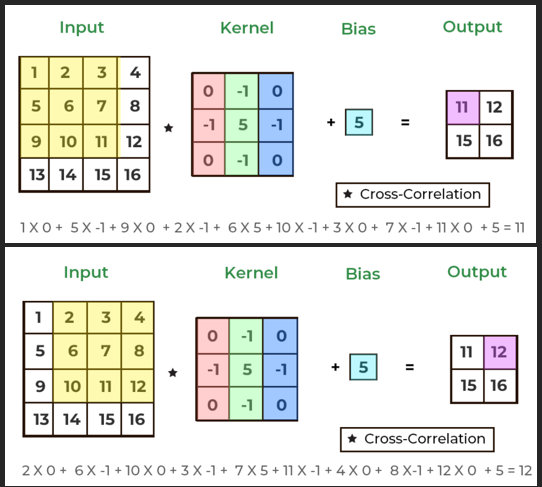

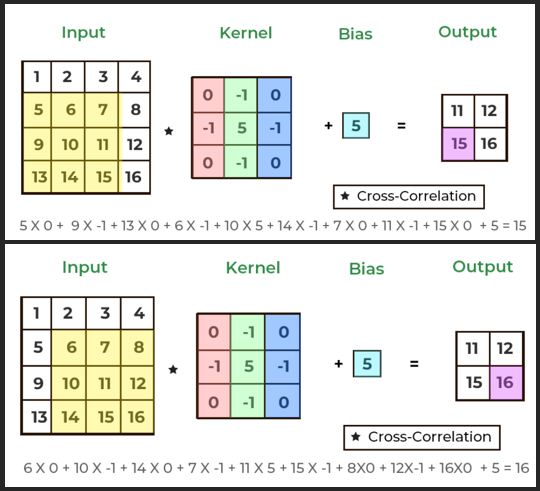

# 2.1.1. Stride

The number of pixels the filter moves (shifts) after each operation.

* Stride = 1 → moves one pixel at a time, produces large, detailed outputs.
* Stride > 1 → moves more pixels at a time, produces smaller, more compressed outputs.







# 2.1.2. Padding


Adding extra pixels around the border of the input before applying convolution.

Types of padding:

* Same padding: Keep the output size the same as the input.

* No padding: The output becomes smaller with each layer.

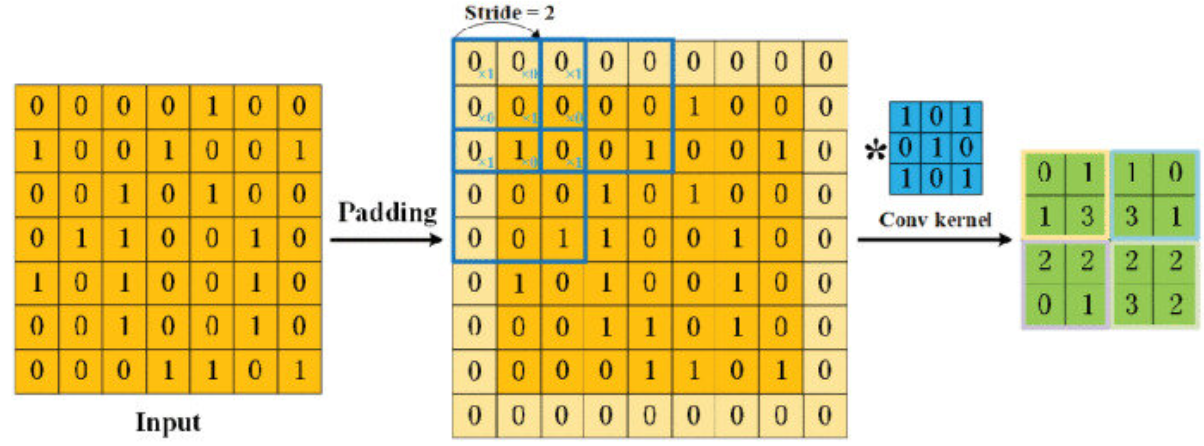

# 2.1.3 Convolution Function in PyTorch

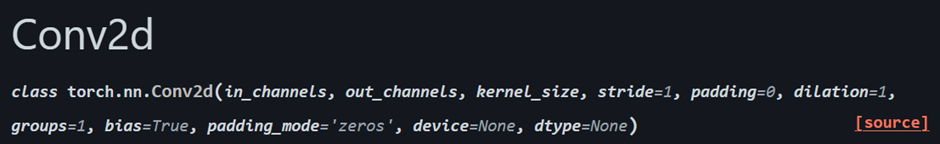

In [ ]:
import torch
import torch.nn as nn

In [ ]:
m = nn.Conv2d(3, 10, 3, stride=2)
input = torch.randn(4, 3, 28, 28)
output = m(input)
# print(output)
print(output.shape)

torch.Size([4, 10, 13, 13])


# 2.2. Downsampling and Upsampling

In downsampling the image size is reduced by a factor and in upsampling the image size is increased by a factor.


There are different types of downsampling and upsampling methods. Maxpooling and nearest neighbour upsampling are some of the most used methods.

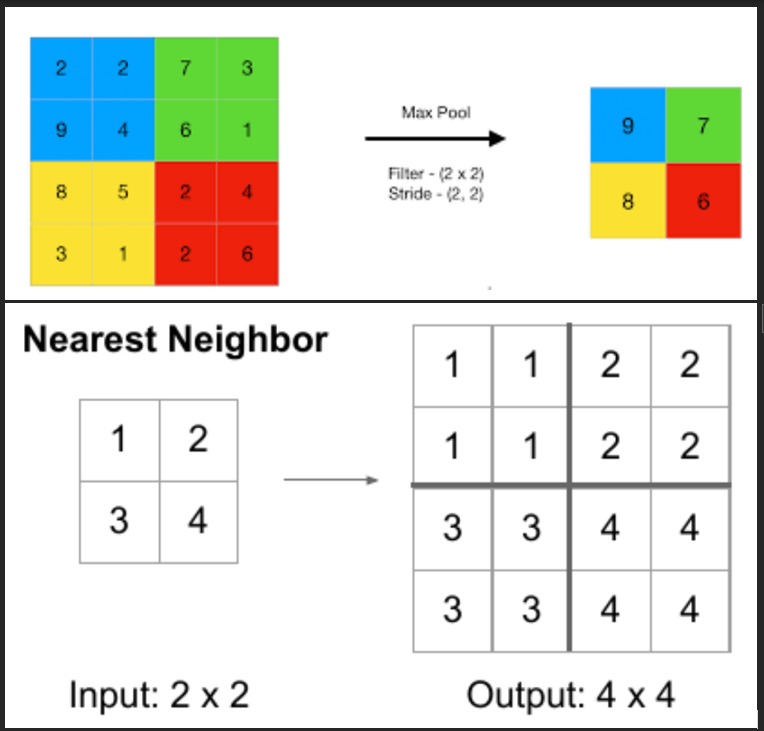

# 2.2.1. Maxpooling Function in PyTorch

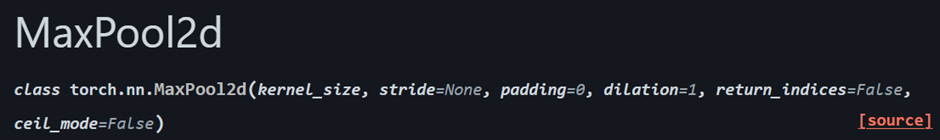

In [ ]:
m = nn.MaxPool2d(2, stride=2)
input = torch.randn(4, 3, 28, 28)
output = m(input)
# print(output)
print(output.shape)

torch.Size([4, 3, 14, 14])


# 2.2.2. Upsampling Function in PyTorch

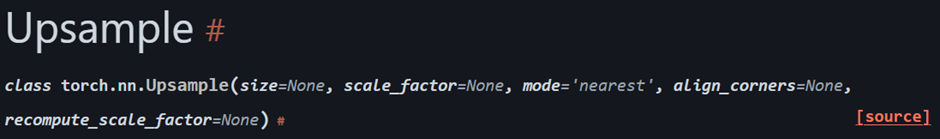

In [ ]:
m = nn.Upsample(scale_factor=2, mode='nearest')
input = torch.randn(4, 3, 28, 28)
output = m(input)
# print(output)
print(output.shape)

torch.Size([4, 3, 56, 56])


# 2.3. Batch Normalization

In batch normalization,


1.   For each mini-batch, calculate the mean and variance of the layer’s outputs.
2.   Normalize each output so it has mean = 0 and variance = 1.
3. Apply learned scale (γ) and shift (β) to allow the network to adjust the normalized values.

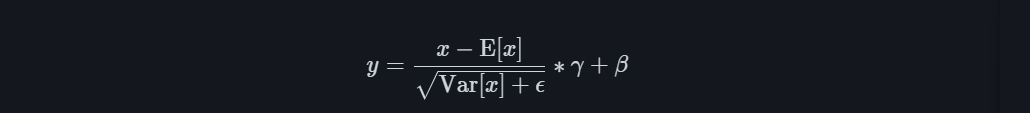

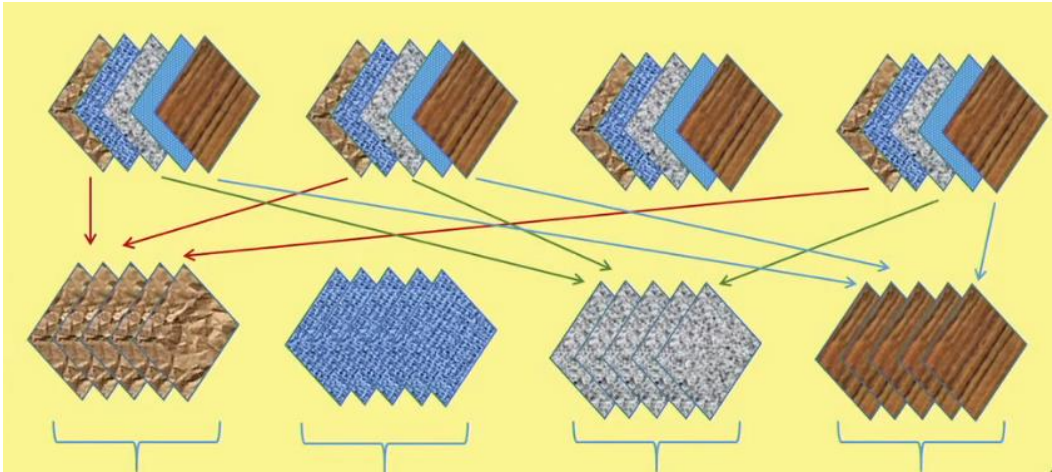

# 2.3.1. Batch Normalization Function in PyTorch

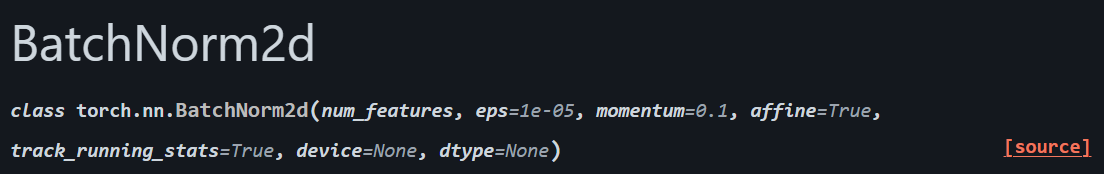

In [ ]:
m = nn.BatchNorm2d(3)
input = torch.randn(4, 3, 28, 28)
output = m(input)
# print(output)
print(output.shape)

torch.Size([4, 3, 28, 28])


# 2.4. Activation Functions

# 2.4.1 ReLU

For CNN, ReLU activation function is mostly used in internal layers.

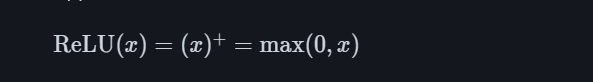

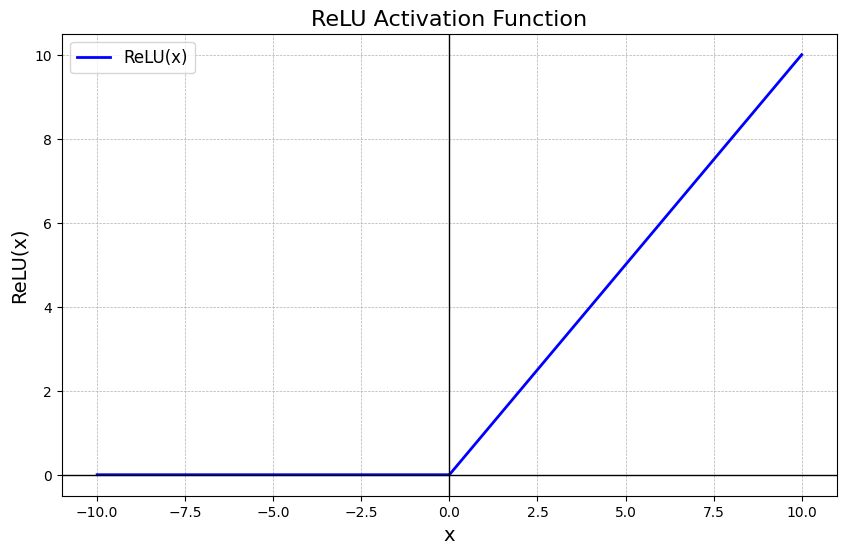

# 2.4.1.1. ReLU Function in PyTorch

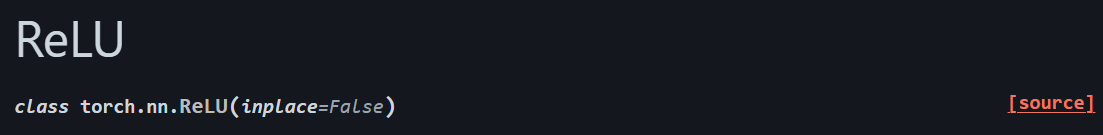

In [ ]:
m = nn.ReLU()
input = torch.randn(4, 3, 28, 28)
output = m(input)
# print(output)
print(output.shape)

torch.Size([4, 3, 28, 28])


# 2.4.2. Sigmoid

Sigmoid function is mostly used in output layer for binary task (i.e., output is 0/1).

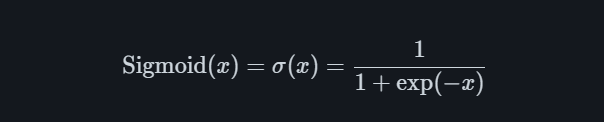

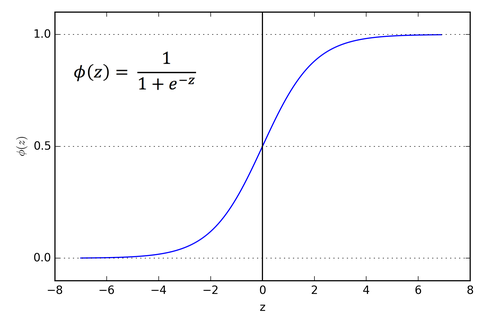

# 2.4.2.1. Sigmoid Function in PyTorch

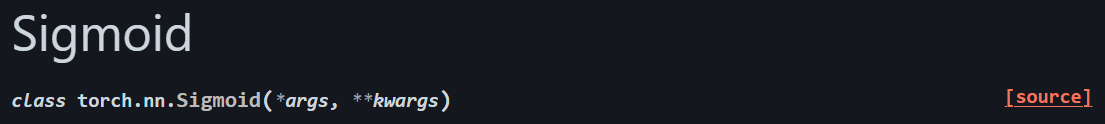

In [ ]:
m = nn.Sigmoid()
input = torch.randn(4, 3, 28, 28)
output = m(input)
# print(output)
print(output.shape)

torch.Size([4, 3, 28, 28])


# 2.4.3. Softmax

Softmax function is mostly used in output layer for multi-output task (Output layer has multiple neurons).

This function is used when the output is one-hot vector, that means, output is of this type [0,0,...,0,1,0,..,0] (only one place is 1, rest are 0's).

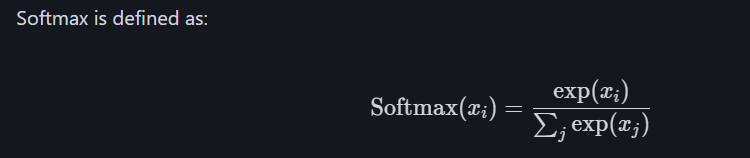

# 2.4.3.1. Softmax Function in PyTorch

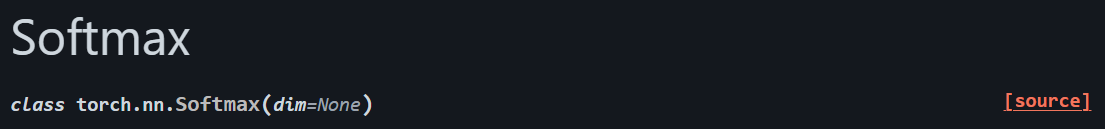

In [ ]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)
print(output.shape)

torch.Size([2, 3])


There are several other activation functions, such as, tanh, GELU etc.

Choice of activation functions depends upon application.

# 2.5. Fully Connected (FC) Layers

This is a fully connected learnable layer mapping vector to vector. This is basically Feed Forward Neural Network (FFNN).

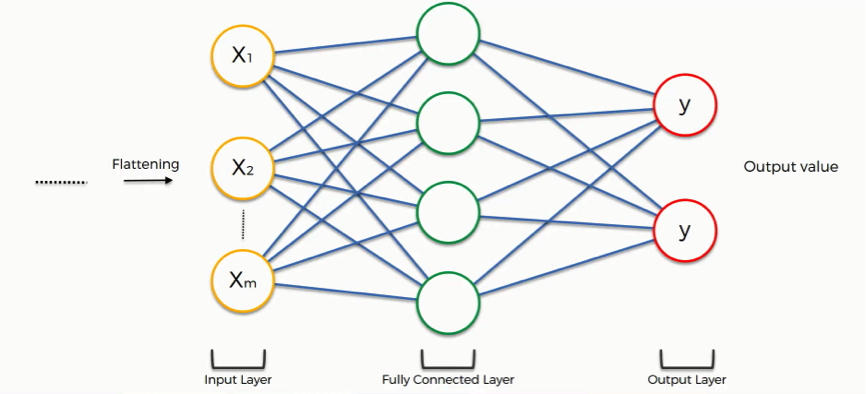

# 2.5.1. FC layer Function in PyTorch

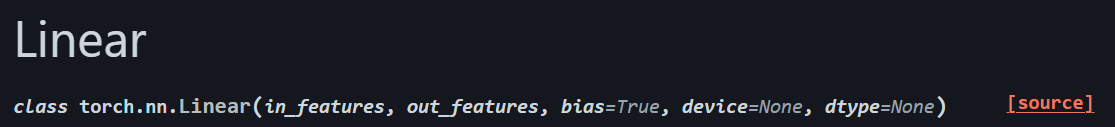

In [ ]:
m = nn.Linear(4, 30)
input = torch.randn(128, 4)
output = m(input)
print(output.shape)

torch.Size([128, 30])


# 3. Dimension Analysis

Dimension analysis of deep learning models ensure valid connections. For CNN, the input-output dimensions are given as follows:

# 3.1. Convolution

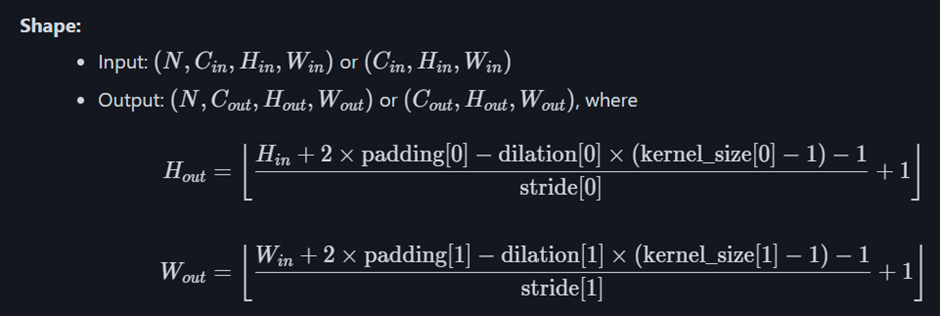

Example:

a) If an image has shape (3,460,460) and a kernel of shape (3,3) with stride 2, no padding is used, then the output feature of the convolution has shape given as:

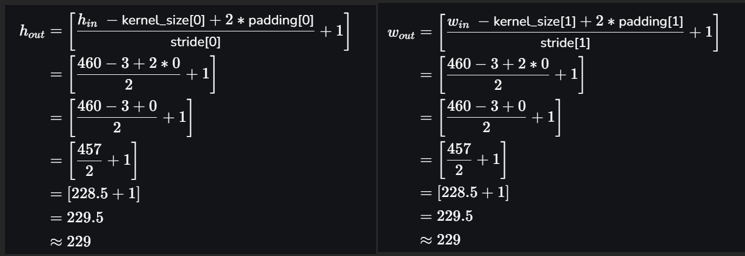

Number of channels is given by the out_channels of the kernel.

Dilation is kept as 1 by default.

# 3.2. Downsampling:

Example:

a) If an image has shape (3,460,460), which is processed by downsampling layer with kernel of shape (2,2), downsampling factor 2, no padding is used, then the output feature of the convolution has shape given as:

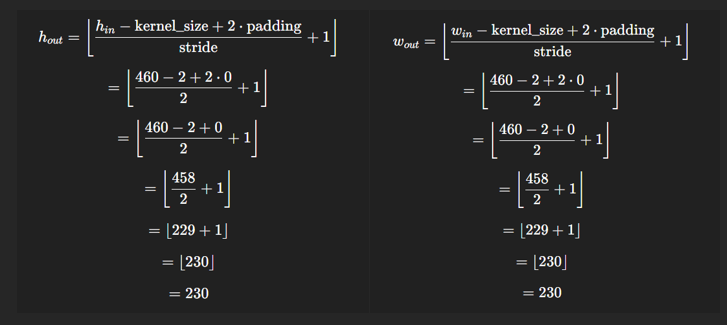

Downsampling doesn't change the number of channels.

# 3.3. Upsampling:

Example:

a) If an image has shape (3,230,230), which is processed by upsampling layer with kernel of shape (2,2), upsampling factor 2, no padding is used, then the output feature of the convolution has shape given as:

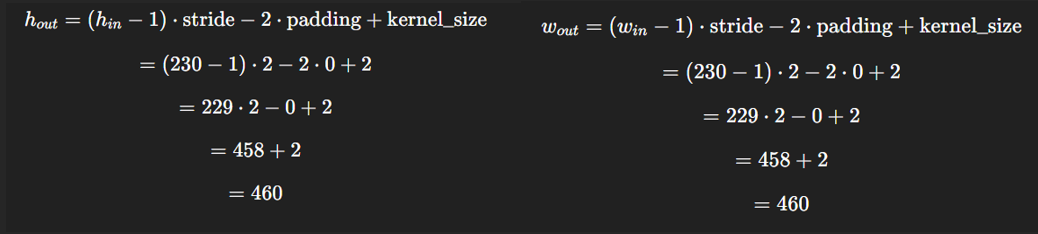

Upsampling doesn't change the number of channels.

# 3.4. Batch Normalization, Activation functions:

Batch Normalization and Activation functions don't change the shape of the image.

# 4. Loss Functions and Evaluation Metrics

# 4.1. Loss Functions

We use different types of losses, such as, Cross Entropy loss, Mean Square Error (MSE) loss etc. Choice of loss function depends on tasks.

It is used during training.

# 4.2. Evaluation Metrics

Evaluation metrics measures the quality of model.

It is used during testing.

We use confusion matrix to determine different metrics. Confusion matrix shows the combination of prediction and ground truth.

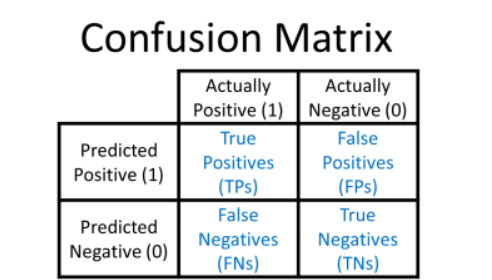

From this confusion matrix, we can define the metrics as follows:

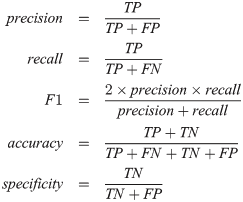

# 5. Some use cases of CNN

# 5.1. Image classification

In image classification, we classify the image, such as classifying as dog/cat image.

Classification has two types:

a) Binary Classification (Binary output, e.g., Is it a cat image or not?)

b) Multi-class classification (Output is one-hot vector, showing the classes, e.g., cat/dog/lion etc.)

Here, the input is an image which has size (3XHXW) and the ouput has size 1 (for binary classification, output is 0/1) or n (For multi-class classification, n is the number of classes).

For this type of task, the size of the image is gradually decreases. Thus, we use convolution, downsampling, batch normalization, activation functions and fully connected layers.

For image classification task, we generally use Cross Entropy loss and Accuracy, precision, recall, F1-score etc. as evaluation metrics.

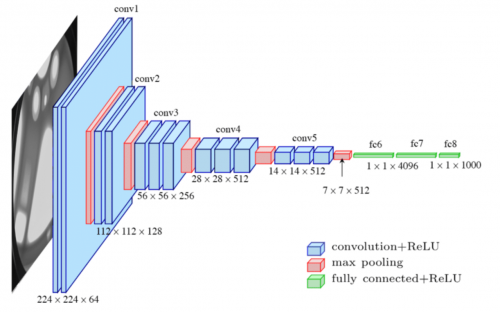

# 5.2. Image Segmentation

In image segmentation, we annotate each of the image pixels to some class.

For example, for Binary image segmentation, we highlight the object of interest in the image.

The output has same size as input image (3XHXW).

For this type of task, we generally decrease the size of the image (Encoder) and then gradually increase the size of the feature (Decoder). Thus, we use convolution, downsampling, batch normalization, activation functions in encoder and convolution, upsampling, batch normalization, activation functions in decoder.

For this task, we usually use IoU loss, CE loss, Dice loss, combinations of different loss functions.

We generally use IoU, mAP, Dice coefficient etc. as performance metrics.

(Details of these will be discussed later)

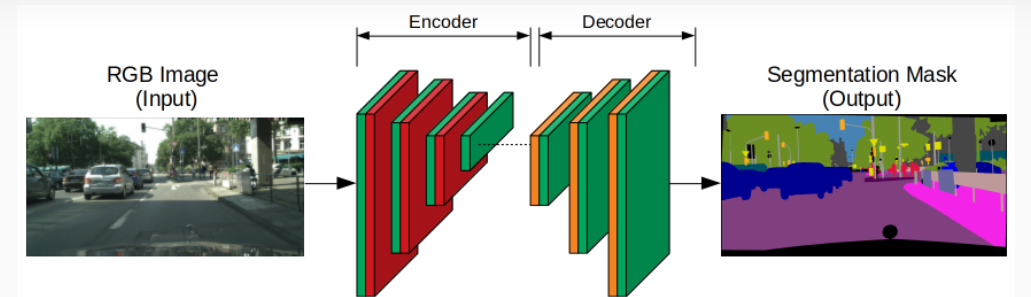

# Practice Questions

1. Verify the feasibility of the CNN networks:

a. (32×32×3) -> Conv2D(k=3, s=1, p=1, out_ch=8) -> (32×32×8) -> ReLU -> (32×32×8) -> MaxPool2D(k=2, s=2) -> (16×16×8)

b. (32×32×3) -> Conv2D(k=33, s=1, p=0, out_ch=16) -> (2×2×3)

c. (28×28×1) -> Conv2D(k=3, s=1, p=1, out_ch=8) -> (28×28×8) -> Conv2D(k=3, s=1, p=1, out_ch=5) -> (28×28×7)

d. (28×28×1) -> Conv2D(k=5, s=1, p=2, out_ch=6) -> (28×28×6) -> BatchNorm -> (28×28×6) -> Conv2D(k=3, s=2, p=1, out_ch=12) -> (14×14×12)

e. (28×28×1) -> Conv2D(k=5, s=1, p=2, out_ch=8) -> (28×28×8) -> MaxPool2D(k=2, s=3) -> (9×9×8)


Here, images/features shape are shown as (Height×Width×Channels)
Kernel size, Stride, Padding, output channels are shown as k, s, p, out_ch respectively.

2. Write code for the following CNN blocks (Consider the input image has shape (32,32,3)):

a. Conv3x3 -> ReLU -> MaxPool

b. Conv5x5 -> BatchNorm -> Conv3x3 stride 2

c. Conv3x3 stride 2 -> ReLU -> Upsample

d. Conv3x3 -> ReLU -> Conv3x3

3. Analyze the shape of the features at each level for the CNN blocks given in Qs 2.

4. Suppose you are given a task, where the output of the neural network can be any of these vectors: [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]. Which activation function do you choose?

5. Suppose for Qs 4, the output vectors can be  [1,0,1,0], [0,1,0,0], [0,0,1,0], [0,0,1,1]. Which activation function would you choose?